## Regression (Linear) Framingham study


the project aims at predicting the **TenYearCHD** through logistic regression modelling 



In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


## `1.` Load and Read the dataset

`a.` load the dataset and view headers

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
url = 'https://courses.edx.org/assets/courseware/v1/7022cf016eefb6d3747447589423dab0/asset-v1:MITx+15.071x+2T2020+type@asset+block/framingham.csv'
fr = pd.read_csv(url)
fr.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


`b.` find the number of rows in the dataset.

In [3]:
# get the total number of rows in the dataframe
n_rows = fr.shape[0]
print('number of rows is :', n_rows)

number of rows is : 4240


`c.` The number of unique entries in the year column in the dataset.

In [4]:
# wehn this outcome is compared to the number of entries, can detect dublicated entries in the column
fr.education.unique()

array([ 4.,  2.,  1.,  3., nan])

`d.` Describe the dataset

In [5]:
fr.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


`e.` get information on the dataset (dtypes, missing values, value_counts)

In [6]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#Sum the number of missing data in the dataset 
fr.isnull().sum().sort_values()

male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
heartRate            1
BMI                 19
cigsPerDay          29
totChol             50
BPMeds              53
education          105
glucose            388
dtype: int64

`f.` convert a varibale datatype and drop na

In [8]:
## quality["StartedOnCombination"] = quality["StartedOnCombination"].astype(int)

In [9]:
dfc = fr.dropna()

In [10]:
dfc.shape

(3658, 16)

## `2.` Prepare the dataset for the model 

`2.a` Split the data

In [19]:
## use numpy to split the data into training and testing datasets 

# set the seed at 1000
#np.random.seed(1000)

#perm = np.random.permutation(dfc.index)
#m = len(dfc.index)
#train_end = int(0.65 * m) # training 65%
#train = dfc.iloc[perm[:train_end]]
#test = dfc.iloc[perm[train_end:]] # testing 35%

train = dfc[:2377]
test = dfc[2377:]

In [20]:
# confirm the splited dataframes
print('train dataset')
print(train.shape)
print("test data set")
print(test.shape)

train dataset
(2377, 16)
test data set
(1281, 16)


## `3.` Correaltion

In [21]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Pairplots**

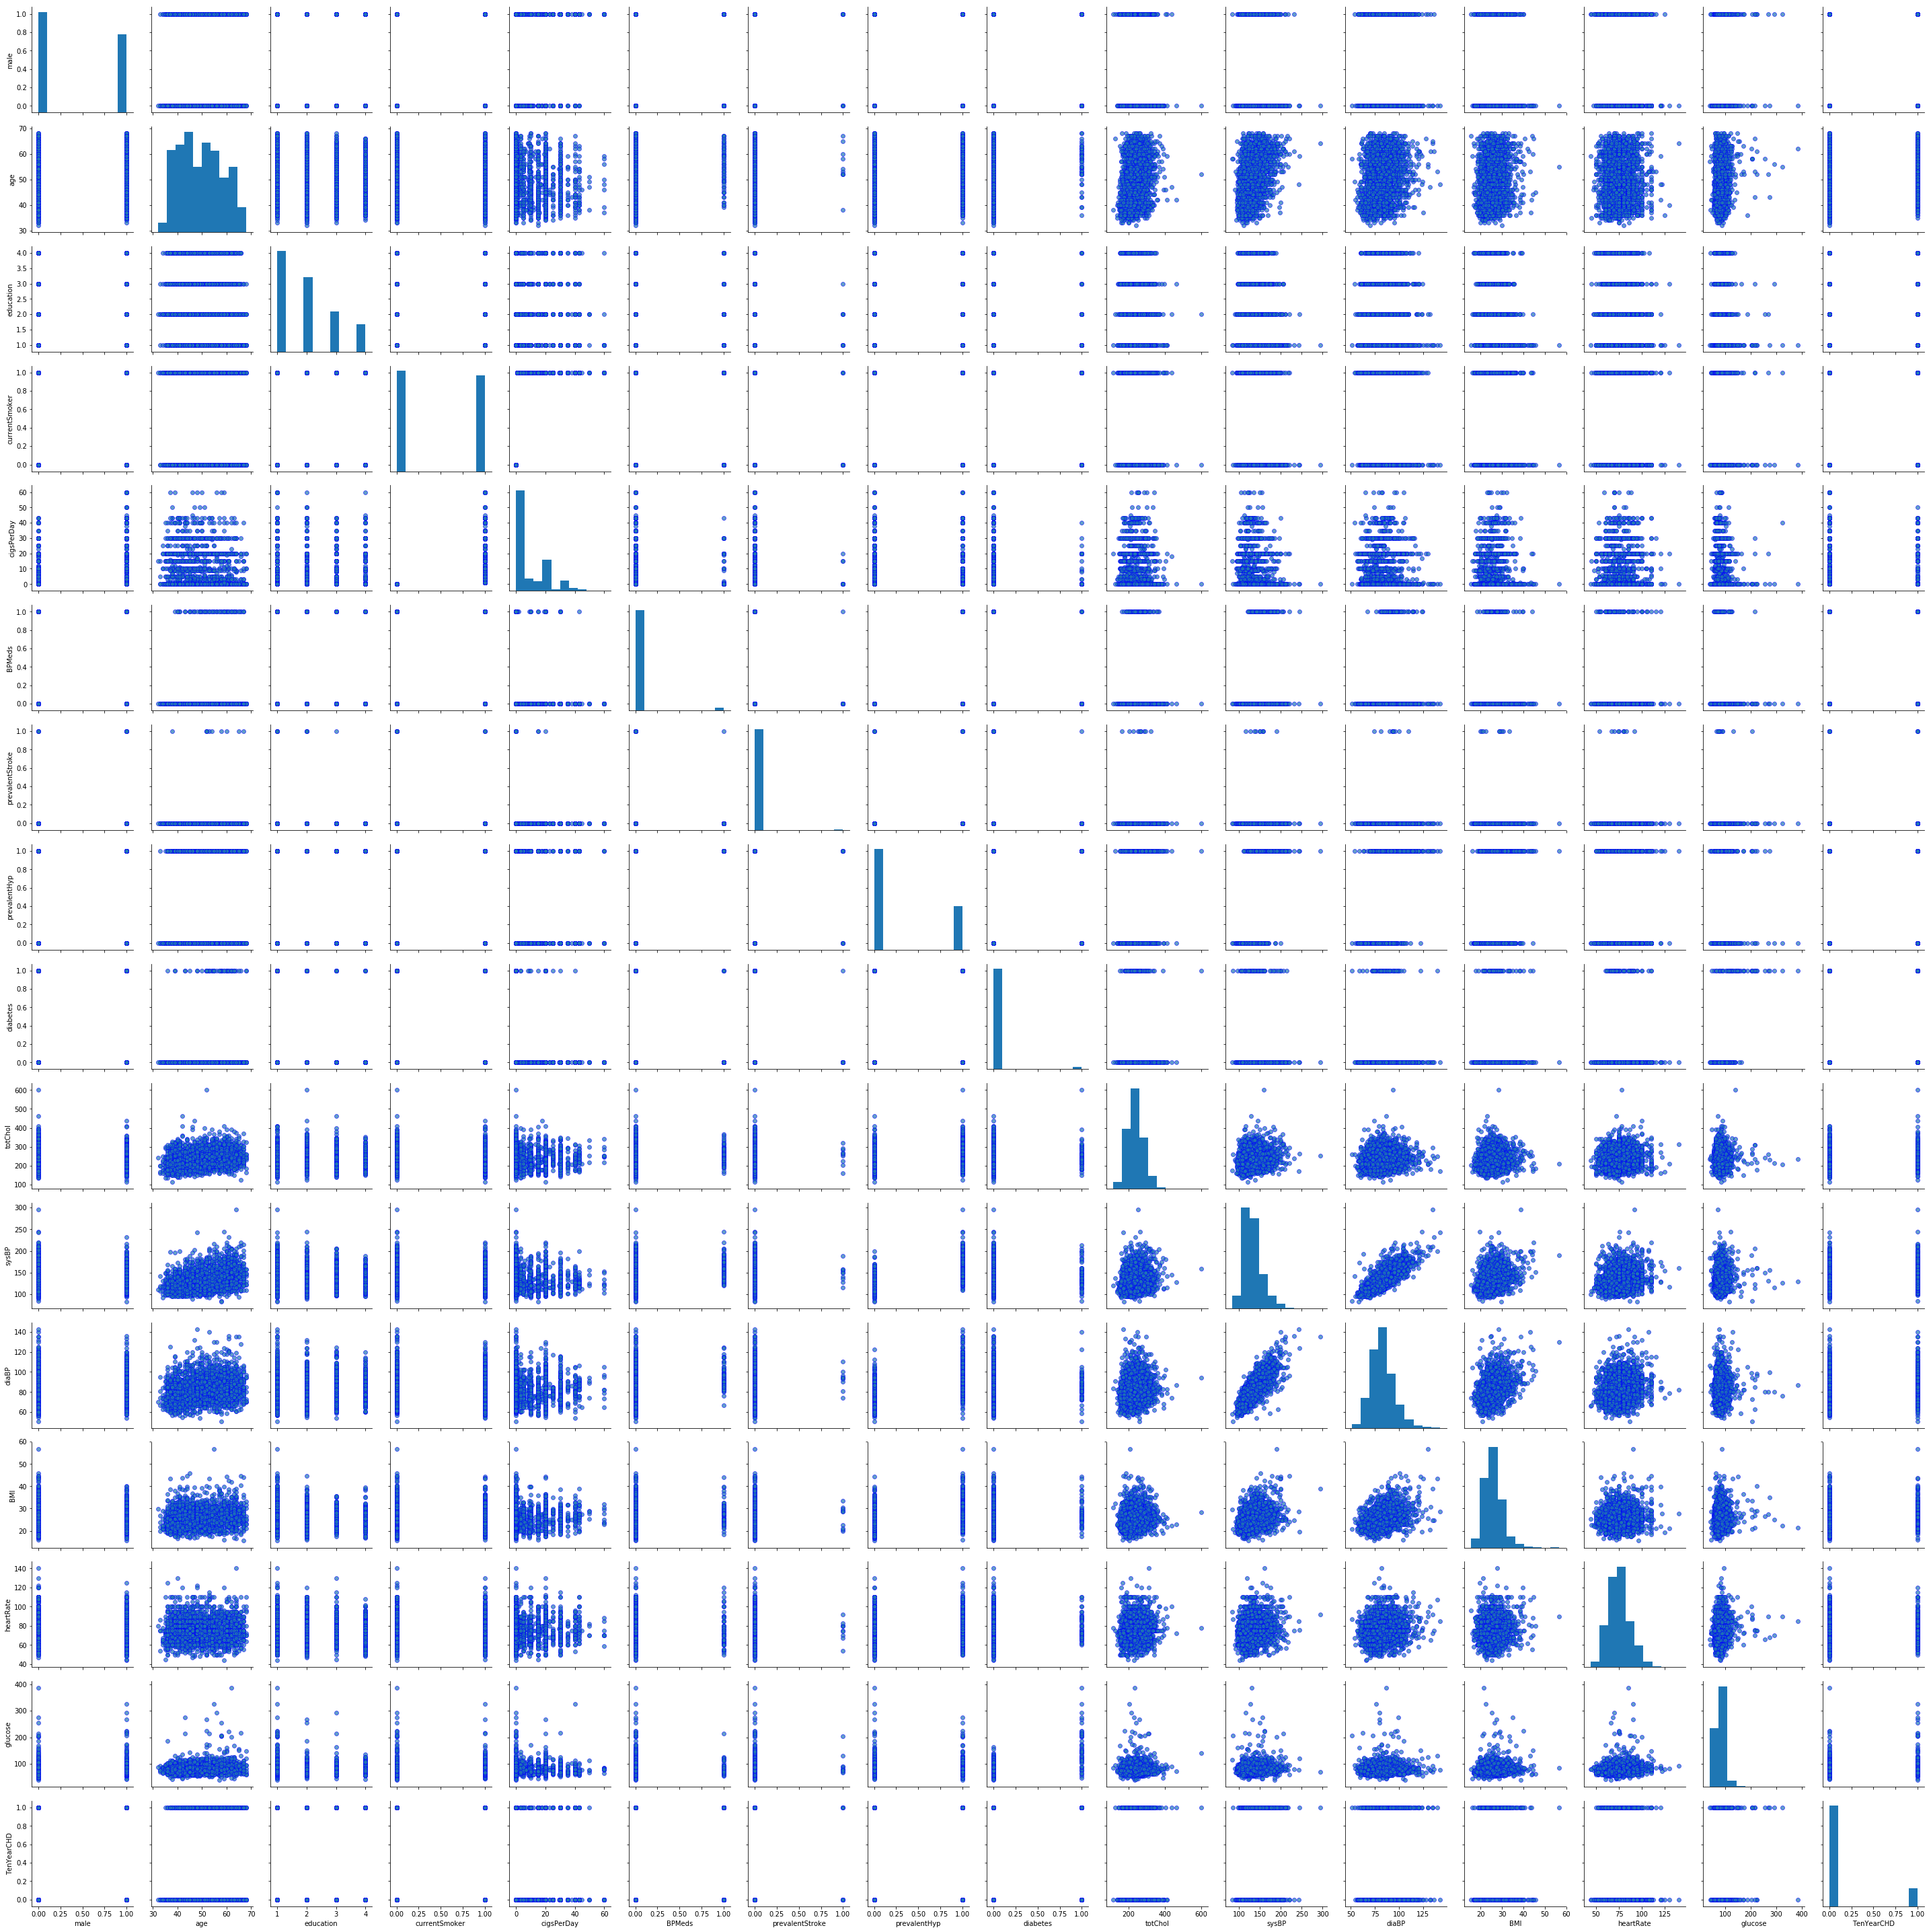

In [22]:
## construct pairplots 

x = train.columns

g = sns.pairplot(train[x], plot_kws={'alpha': 0.7, 'edgecolor': 'blue'})
fig = g.fig;

**Corelation heatmap**

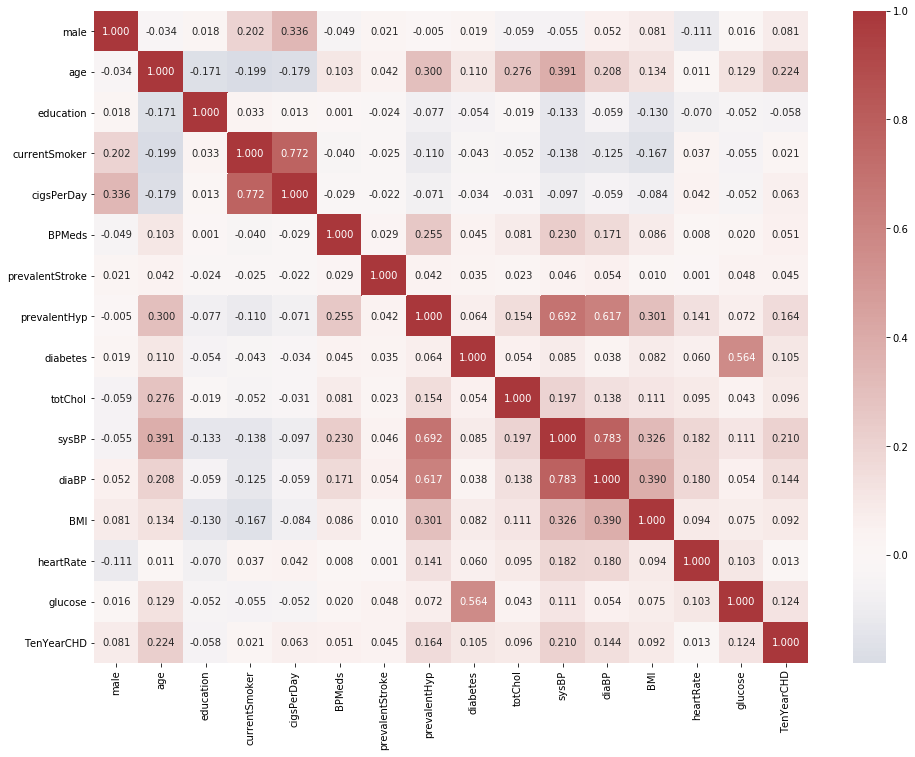

In [23]:
# correlation plot
plt.figure(figsize = [16, 12])
sns.heatmap(train[x].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.show()

## `4.` Logistic regression model 
#### We want to predict 0 or 1 (True or False)

`4.a` Logistic regression model with one parameter

In [24]:
# apply logistic regression model 
train['intercept'] = 1
logm = sm.Logit(train['TenYearCHD'],train[['intercept','male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']])
result = logm.fit()

Optimization terminated successfully.
         Current function value: 0.378519
         Iterations 7


C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# read the results summary 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2377
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           15
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:                  0.1098
Time:                        21:11:48   Log-Likelihood:                -899.74
converged:                       True   LL-Null:                       -1010.7
                                        LLR p-value:                 6.913e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -8.4235      0.883     -9.540      0.000     -10.154      -6.693
male                0.4385      0.135      3.239      0.001       0.173       0.704
age                 0.0596      0.008      7.279      0.000       0.044       0.076
education          -0.0184      0.061     -0.300      0.764      -0.139       0.102
currentSmoker      -0.0045      0.195     -0.023      0.982      -0.386       0.377
cigsPerDay          0.0230      0.008      2.975      0.003       0.008       0.038
BPMeds             -0.0668      0.317     -0.211      0.833      -0.688       0.555
prevalentStroke     0.7323      0.704      1.040      0.298      -0.648       2.112
prevalentHyp        0.1525      0.172      0.888      0.375      -0.184       0.489
diabetes            0.2793      0.400      0.698      0.485      -0.505       1.064
totChol             0.0027      0.001      1.986      0.047    3.58e-05       0.005
sysBP               0.0151      0.005      3.231      0.001       0.006       0.024
diaBP              -0.0026      0.008     -0.323      0.747      -0.018       0.013
BMI                 0.0189      0.016      1.211      0.226      -0.012       0.049
heartRate          -0.0064      0.005     -1.210      0.226      -0.017       0.004
glucose             0.0080      0.003      2.547      0.011       0.002       0.014
===================================================================================
"""

`Interpret the results`

If the coeffient value of a variable is **positive**, means the variable **helps the model make the outcome of 1 more likely**.

If the coeffient value of a variable is **negative**, means the variable **helps the model make the outcome of 0 more likely**.


`4.b` Check the outcome of the model

In [26]:
predict_train = result.predict(train[['intercept','male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']])

In [29]:
## compare the means of the predicted values and the true values 
print('predicted :', predict_train.mean())
print('Actual values :',train.TenYearCHD.mean())

predicted : 0.15145140933950343
Actual values : 0.15145140933950357


C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


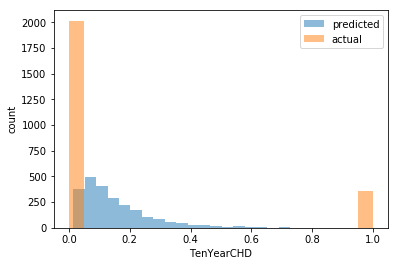

In [31]:
hamada_hist = dict(histtype='stepfilled', alpha=0.5, normed=False, bins=20)
plt.hist(predict_train, **hamada_hist);# the stars mean take the ling specified by what is after
plt.hist(train.TenYearCHD, **hamada_hist);
names = ['predicted', 'actual']
plt.xlabel('TenYearCHD')
plt.ylabel('count')
plt.legend(names) # alwys better to save the legend names in a list and add the name of the list
plt.show()


#### `4.c` **Logistic regression threshold value**

A model with a **higher threshold** will have a **lower sensitivity
and a higher specificity**.

A model with a **lower threshold** will have a **higher sensitivity
and a lower specificity**.

In [35]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs])
scores = score_model(predict_train, 0.4)

#### `4.d` confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
y_true = np.array(train.TenYearCHD)
y_predict = scores
confusion = confusion_matrix(y_true,y_predict)
print(confusion)

[[1965   52]
 [ 303   57]]


#### `4.e` Sensetivity and Specifity

A model with a **higher threshold** will have a **lower sensitivity
and a higher specificity**.

A model with a lower threshold will have a higher sensitivity
and a lower specificity.

In [37]:
## define the cinfusion matrix parameters 
tn = confusion[0,0]
tp = confusion[1,1]
fp = confusion[0,1]
fn = confusion[1,0]
sensetivity = tp/(tp+fn)
specifity = tn/(tn+fp)
print('sensetivity :', sensetivity)
print('specifity :', specifity)

sensetivity : 0.15833333333333333
specifity : 0.9742191373326723


We changed the threshold value from 0.5 to 0.211 to get the sensetivity and the specifity close to each other 

**`4.f`** **`ROC - Receiver Operator Characteristic Cureve`** helps in deciding the threshold value 

In [39]:
## create a loop that costruct a dataframe with threshold and sensetivity and 1-sepcifity 
column_names = ('threshold', 'sensitivity', '1-specifity')
df_roc = pd.DataFrame(columns = column_names)
for i in (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1):
    scores=score_model(predict_train, i)
    y_true = np.array(train.TenYearCHD)
    y_predict = scores
    confusion = confusion_matrix(y_true,y_predict)
    tn = confusion[0,0]
    tp = confusion[1,1]
    fp = confusion[0,1]
    fn = confusion[1,0]
    sensetivity = tp/(tp+fn)
    specifity = tn/(tn+fp)
    df_roc = df_roc.append({'threshold': i, 'sensitivity':sensetivity, 
                 '1-specifity':1-specifity }, ignore_index=True)


In [40]:
df_roc.head(11)

,threshold,sensitivity,1-specifity
0,0.0,1.000000,1.000000
1,0.1,0.841667,0.542885
2,0.2,0.530556,0.201289
3,0.3,0.261111,0.076351
4,0.4,0.158333,0.025781
5,0.5,0.083333,0.005454
6,0.6,0.019444,0.001983
7,0.7,0.008333,0.000000
8,0.8,0.000000,0.000000
9,0.9,0.000000,0.000000


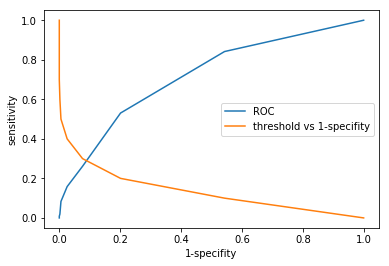

In [41]:
# plot the ROC cureve with threshold value
plt.plot(df_roc['1-specifity'],df_roc.sensitivity)
plt.plot(df_roc['1-specifity'],df_roc.threshold)
plt.xlabel('1-specifity')
plt.ylabel('sensitivity')
leg = ['ROC', 'threshold vs 1-specifity']
plt.legend(leg)

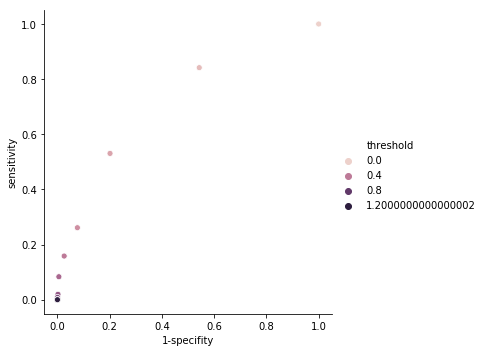

In [43]:
sns.relplot(data=df_roc,x='1-specifity', hue = 'threshold',y='sensitivity');

In [46]:
# calculate the AUC 'Area Under the Curve'
from sklearn import  metrics
# metrics.roc_auc_score(true_y, predicted_scores)
metrics.roc_auc_score(y_true,y_predict) ##### something is wrong 

0.5

## `5.` Making predictions

In [47]:
predict_test = result.predict(test)

In [54]:
predict_test.dtype

dtype('float64')

In [61]:
## merge the predicted data with the test data 
df_test_predict['predicted'] = predict_test

In [62]:
df_test_predict['accuaracy'] = df_test_predict.TenYearCHD - df_test_predict['predicted']

In [65]:
df_test_predict.head(80)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,0,accuaracy,predicted
2766,0,58,2.0,1,20.0,0.0,0,1,0,231.0,165.0,94.5,27.02,100.0,80.0,0,1.0,-1.0,1.0
2767,1,65,4.0,0,0.0,0.0,0,0,0,253.0,111.0,60.0,24.12,60.0,69.0,0,1.0,-1.0,1.0
2768,0,44,2.0,0,0.0,0.0,0,0,0,226.0,123.0,82.0,24.67,72.0,70.0,0,1.0,-1.0,1.0
2769,0,41,1.0,0,0.0,0.0,0,0,0,228.0,93.0,71.0,31.57,50.0,85.0,0,1.0,-1.0,1.0
2770,0,60,1.0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1.0,-1.0,1.0
2772,0,40,2.0,1,9.0,0.0,0,0,0,240.0,115.0,72.0,18.82,80.0,68.0,0,1.0,-1.0,1.0
2774,0,56,2.0,0,0.0,0.0,0,0,0,280.0,101.0,71.0,28.22,79.0,67.0,0,1.0,-1.0,1.0
2775,0,52,2.0,0,0.0,0.0,0,1,0,260.0,171.0,118.0,28.33,69.0,80.0,1,1.0,0.0,1.0
2776,1,54,1.0,0,0.0,0.0,0,0,0,235.0,132.0,87.0,26.13,65.0,75.0,0,1.0,-1.0,1.0
2777,0,42,4.0,0,0.0,0.0,0,0,0,278.0,118.5,72.0,21.99,72.0,78.0,0,1.0,-1.0,1.0
